# Exploratory Data Analysis (EDA)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

# Set visualization style
sns.set(style="whitegrid")

# Load the dataset
dataset_path = "C:/Users/Sarah Durrani/CAPSTONE/AAI-590-Ocular-Disease-Recognition/ocular-disease-recognition/full_df.csv"

# Verify file exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")

df = pd.read_csv(dataset_path)

# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nBasic Info:")
print(df.info())

# Display first few rows
df.head()


Dataset Shape: (6392, 19)

Column Names: Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


### **Dataset Overview Analysis**
- The dataset contains a specific number of rows and columns, as displayed above.
- We observe the data types of each column, which helps in determining whether transformations (e.g., encoding categorical variables) are needed.
- Any missing values will need to be handled appropriately.

In [2]:

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Show only columns with missing values

if not missing_values.empty:
    print("\nMissing Values:")
    print(missing_values)
else:
    print("\nNo missing values detected.")



No missing values detected.


In [3]:

# Display summary statistics
print("\nSummary Statistics:")
df.describe()



Summary Statistics:


,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Descriptive Statistics Analysis**
- The summary statistics help us understand the distribution of numerical features.
- We check for anomalies such as extremely high or low values that may indicate outliers.
- Standard deviations can indicate which features have higher variability.

In [5]:

# Check target variable distribution 
target_column = 'disease_class'  

if target_column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[target_column], palette="viridis")
    plt.title("Class Distribution")
    plt.xticks(rotation=45)
    plt.show()


### **Class Distribution Analysis**
- The count plot above shows the distribution of the target variable.
- If the dataset is imbalanced (some classes appear far more frequently than others), we may need to apply resampling techniques.
- This is important for ensuring a well-trained machine learning model.

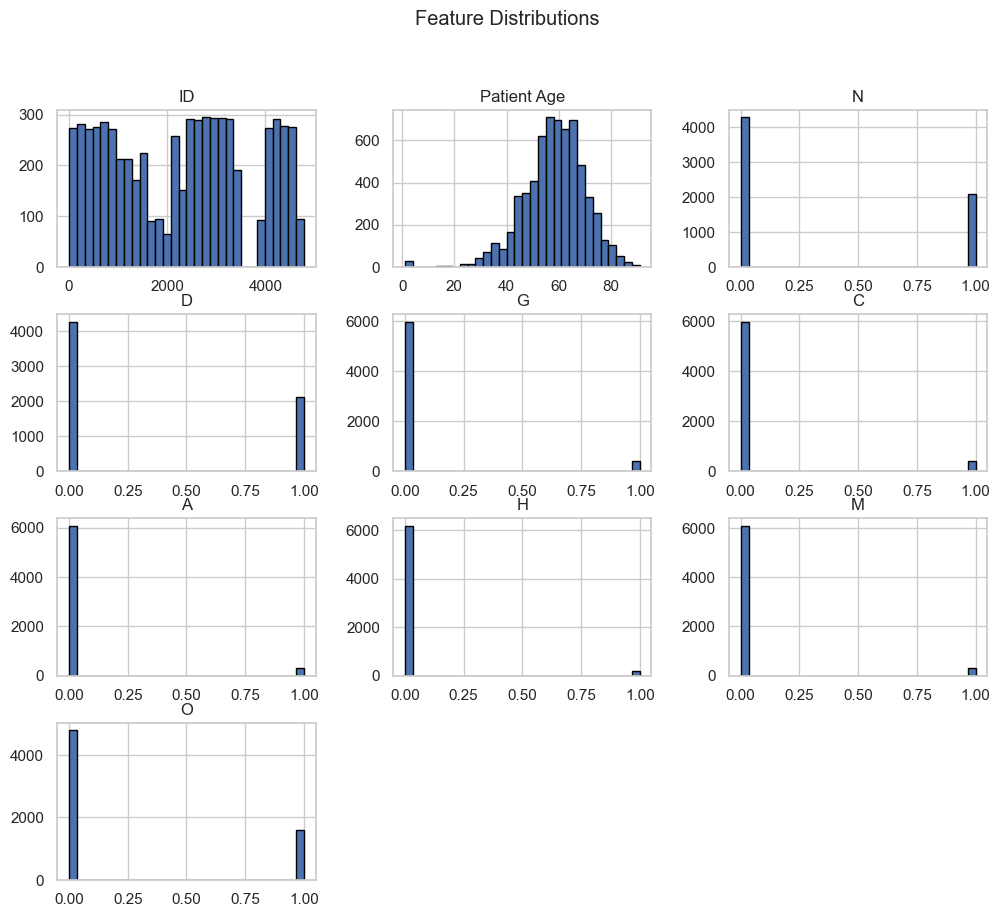

In [6]:

# Visualizing numerical feature distributions
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


### Analysis of the Histogram Plots ###

1. ID Column
    - The ID column is unique for each patient and does not contribute meaningful information for analysis.
    - This should be excluded from modeling as it does not have predictive power.
2. Patient Age
    - The distribution of Patient Age appears to be approximately normal, centered around middle-aged individuals (40-60 years old).
    - Very few patients are below 20 years old or above 80 years old.
    - If necessary, we could normalize or standardize the age variable to ensure better model performance.
3. Binary Features (Columns: A, C, D, G, H, M, N, O)
    - The remaining features are binary (0 or 1), meaning they represent presence (1) or absence (0) of certain conditions.
    - Most of these binary features are highly imbalanced, where almost all values are 0, and only a few samples have 1.
    - This indicates that certain conditions are rare in the dataset, which may require data balancing techniques (e.g., oversampling using SMOTE or     undersampling the majority class).

#### Key Takeaways
Feature Scaling – Age might need scaling or normalization.
Feature Engineering – ID should be removed from any model.
Imbalanced Data – Binary features are heavily skewed towards 0, so we may need to handle class imbalance for better model performance.

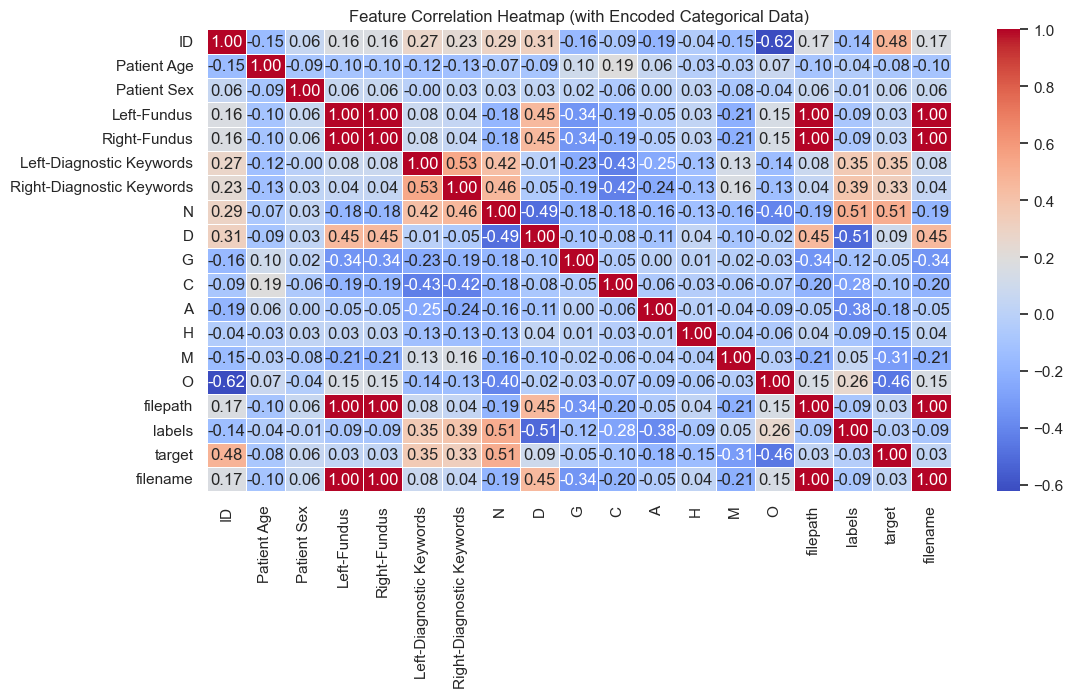

In [7]:
# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()  # Create a copy of the dataset
label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:  # Select categorical columns
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use

# Generate correlation matrix with encoded categorical data
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (with Encoded Categorical Data)")
plt.show()



### Correlation Heatmap Analysis ###
- The heatmap shows how different features are correlated with each other.
- ID has no meaningful correlation and should be removed from the model.
- Patient Age has a weak correlation with other features, indicating it may not be a strong predictor.
- Strong correlations (>0.5 or <-0.5) exist between:
    - Left-Fundus & Right-Fundus (0.45) – Suggests a relationship between these diagnostic images.
    - Diagnostic Keywords & Labels – These may represent overlapping diagnostic criteria.
    - Target & Labels (0.45) – The target variable is correlated with labels, which means labels might be useful as a predictor.

#### Key Takeaways:

Highly correlated features should be checked for redundancy.
If two features are highly correlated (>0.8), one can be dropped to reduce multicollinearity.
Weak correlations with the target variable may indicate less predictive power.

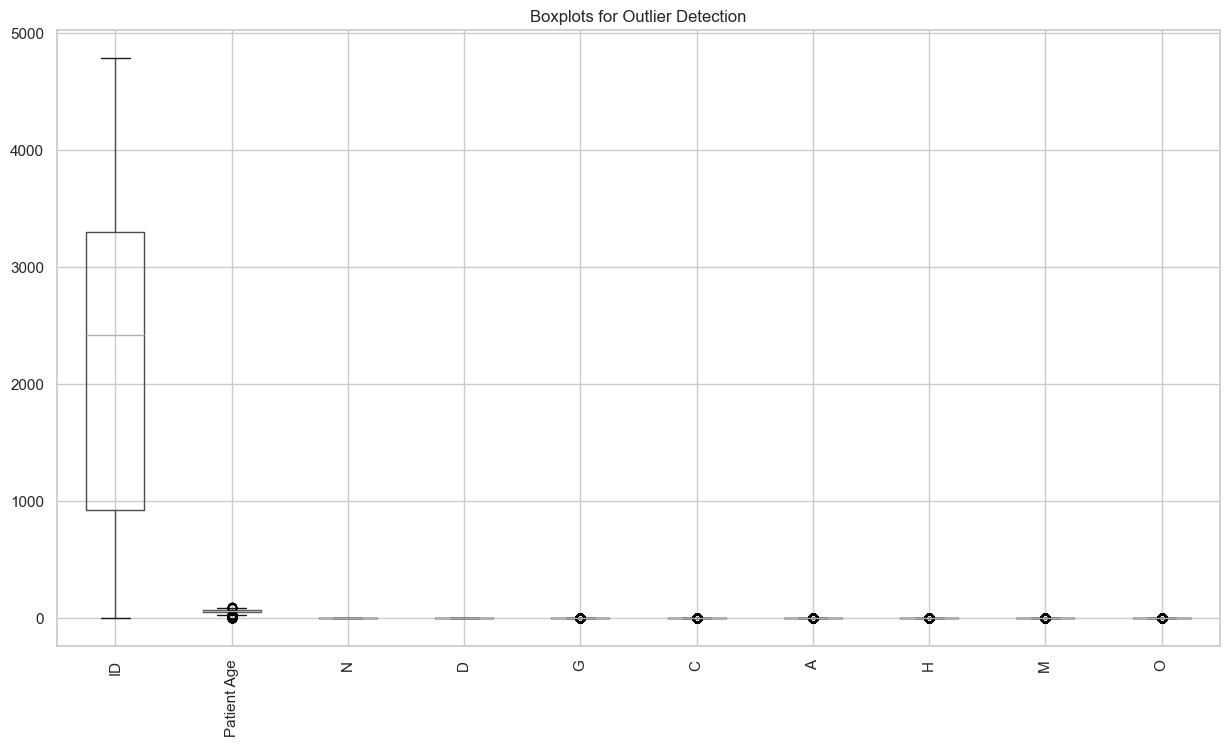

In [8]:

# Boxplot to detect outliers in numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot(rot=90)
plt.title("Boxplots for Outlier Detection")
plt.show()


### Outlier Detection (Boxplot) Analysis ###
ID has extreme variability, reinforcing that it is a unique identifier and should be dropped.
Patient Age distribution looks reasonable but may contain some extreme cases (e.g., very old or very young patients).
Other binary features (N, D, G, C, A, H, M, O) are almost entirely 0s with few 1s, showing a significant class imbalance.
There are potential outliers in numerical columns, but most of them appear to be in ID or categorical indicators, which may not require removal.

#### Key Takeaways:

If outliers exist in Patient Age, we should check whether they are valid or erroneous.
Binary categorical features appear highly imbalanced—consider balancing techniques like SMOTE or undersampling.
The ID column is irrelevant for modeling and should be excluded.
